In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score,classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xb
from sklearn.model_selection import cross_val_score

In [194]:
oe=OneHotEncoder(sparse_output=False)
linear_model=LinearRegression()

In [185]:
data=pd.read_csv('/home/mrkernal/Downloads/archive/housing_price_dataset.csv')

In [186]:
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [191]:
data['Neighborhood'].value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [198]:
encoded_data=oe.fit_transform(data[['Neighborhood']]).astype(int)

In [199]:
encoded_df=pd.DataFrame(encoded_data,columns=oe.get_feature_names_out(['Neighborhood']))

In [202]:
data=pd.concat([data,encoded_df],axis=1)

In [207]:
data.drop(columns=['Neighborhood'],inplace=True)

In [210]:
x=data.drop(columns=['Price'])

In [212]:
y=data['Price']

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [214]:
print(x_train.shape,x_test.shape)

(40000, 7) (10000, 7)


In [215]:
Linear_model=LinearRegression()

In [216]:
Linear_model

LinearRegression()

In [217]:
Linear_model.fit(x_train,y_train)

LinearRegression()

In [218]:
ypred=Linear_model.predict(x_test)

In [240]:
print(mse(y_test,ypred))
print(mae(y_test,ypred))
print(r2_score(y_test,ypred))

2436249371.3072467
39430.16533829791
0.5755628630306235


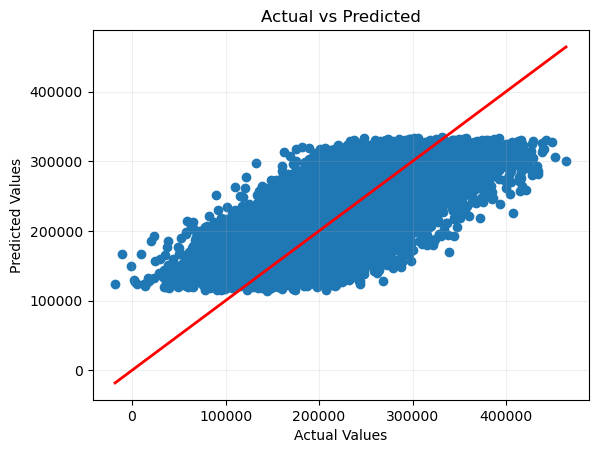

In [222]:
plt.scatter(y_test, ypred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='r',lw=2)
plt.grid(True,alpha=0.2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [223]:
Ran_model=RandomForestRegressor()

In [224]:
Ran_model.fit(x_train,y_train)

RandomForestRegressor()

In [225]:
ypred_rfr=Ran_model.predict(x_test)

In [226]:
mse_rfr=mse(y_test,ypred_rfr)
mae_rfr=mae(y_test,ypred_rfr)
r2score_rfr=r2_score(y_test,ypred_rfr)
print(mse_rfr,mae_rfr,r2score_rfr)

2769372894.40028 41926.12211276714 0.5175269344988527


In [227]:
# xgboost

In [228]:
xb_model=xb.XGBRegressor(objective='reg:squarederror',n_estimators=100)

In [229]:
xb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [230]:
ypred_xb=xb_model.predict(x_test)

In [231]:
print(f'MSE: {mse(y_test, ypred_xb)}')
print(f'MAE: {mae(y_test, ypred_xb)}')
print(f'R²: {r2_score(y_test, ypred_xb)}')

MSE: 2552340690.85289
MAE: 40268.9267789554
R²: 0.5553377301377166
